<a href="https://colab.research.google.com/github/jennabittner/ASTRON-5205/blob/main/TransitCurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HD 189733b, Transit for Radius**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii
%matplotlib inline

tr_data_2 = astropy.io.ascii.read("UID_0098505_PLC_017.tbl.txt", format = 'ipac')

In [ ]:
# Print column names
print('Column names:')
print()
tr_data_2.colnames

Column names:



['HJD', 'Flux', 'Flux_Uncertainty', 'Accepted']

In [ ]:
# Extract time and flux columns
time_2 = tr_data_2['HJD']  # Heliocentric Julian Date
flux_2 = tr_data_2['Flux']

# Estimate out-of-transit flux using the median
out_of_transit_flux_2 = np.median(flux_2)

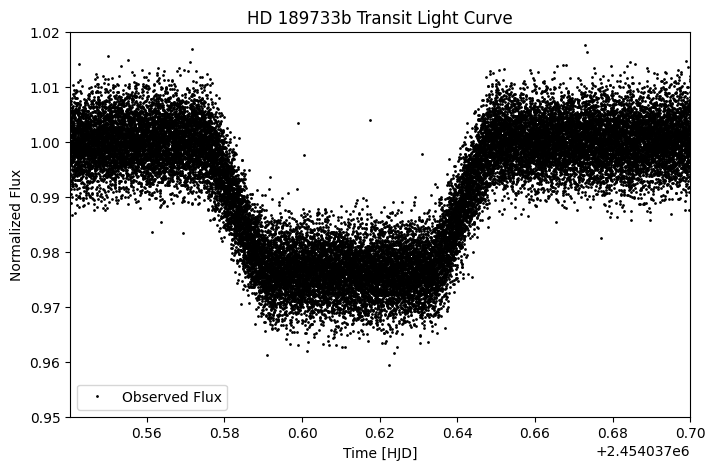

In [ ]:
# Normalize the flux
normalized_flux_2 = flux_2 / out_of_transit_flux_2

# Plot time vs. normalized flux
plt.figure(figsize=(8, 5))
plt.plot(time_2, normalized_flux_2, 'k.', markersize=2, label='Observed Flux')
plt.xlabel('Time [HJD]')
plt.ylabel('Normalized Flux')
plt.title('HD 189733b Transit Light Curve')
plt.legend()

plt.xlim(min(time_2), 7.7+2.45403e6)
plt.ylim(0.95, 1.02)

plt.show()

# **Trying Batman fit**

In [ ]:
!pip install batman
import batman

In [ ]:
print(dir(batman))


['TransitModel', 'TransitParams', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_custom_ld', '_eclipse', '_exponential_ld', '_logarithmic_ld', '_nonlinear_ld', '_power2_ld', '_quadratic_ld', '_rsky', '_uniform_ld', 'make_plots', 'openmp', 'plots', 'test', 'tests', 'transitmodel']


In [ ]:
!ip uninstall batman batman-package -y
!pip install batman-package


Object "uninstall" is unknown, try "ip help".


In [ ]:
import pylightcurve as plc
import matplotlib.pyplot as plt
import numpy as np

planet = plc.Planet(
    name='HD189733b',

    ra = plc.Hours('20:0:43'),                  # float values are assumed to be in degrees,


    dec = plc.Degrees(22),                  # float values are assumed to be in degrees,
                                   # alternatively, you can provide a plc.Hours or plc.Degrees object
                                   # here it would be plc.Degrees('+18:53:03.548')

    stellar_logg = 4.5706620156500,           # float, in log(cm/s^2)

    stellar_temperature = 4875,  # float, in Kelvin

    stellar_metallicity = 0.04078877583520000,     # float, in dex(Fe/H) or dex(M/H)

    rp_over_rs = 0.15534,          # float, no units

    period = 2.21857567,            # float, in days

    sma_over_rs = 8.84,            # float, no units

    eccentricity = 0.0,            # float, no units

    inclination = 85.71,           # float values are assumed to be in degrees,
                                   # alternatively, you can provide a plc.Hours or plc.Degrees object
                                   # here it would be plc.Degrees(86.71)

    periastron = 136.42,              # float values are assumed to be in degrees,
                                   # alternatively, you can provide a plc.Hours or plc.Degrees object
                                   # here it would be plc.Degrees(0.0)

    mid_time = 2457929.288,      # float, in days

    mid_time_format = 'BJD_TDB',   # str, available formats are JD_UTC, MJD_UTC, HJD_UTC, HJD_TDB, BJD_UTC, BJD_TDB

    ldc_method = 'claret',         # str, default = claret, the other methods are: linear, quad, sqrt

    ldc_stellar_model = 'phoenix', # str, default = phoenix, the other model is atlas

    albedo = 0.15,                 # float, default = 0.15, no units

    emissivity = 1.0,              # float, default = 1.0, no units
)

In [ ]:
limb_darkening_coefficients = planet.filter('TESS').limb_darkening_coefficients
fp_over_fs = planet.filter('TESS').fp_over_fs
rp_over_rs = planet.filter('TESS').rp_over_rs # no difference from planet.rp_over_rs if we have not defined our own filter

print(limb_darkening_coefficients)

PHOENIX models are only computed for solar metallicity stars. Setting stellar_metallicity = 0.
Fp/Fs estimated using A=0.15, e=1.0 for filter TESS.
[0.529641442398968, -0.13363121581119025, 0.5558327957440783, -0.23102067439192261]


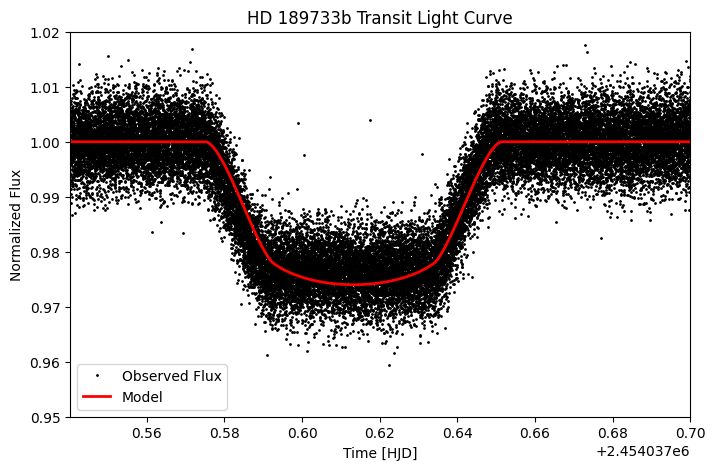

"\n# Create Model Light Curve\nm = batman.TransitModel(params, time_2)  # Generate the transit model\nmodel_flux = m.light_curve(params)  # Compute flux values\n\n# Plot Observed vs. Modeled Transit Curve\nplt.figure(figsize=(8, 5))\nplt.plot(time_2, normalized_flux_2, 'k.', markersize=2, label='Observed Flux')  # Data\nplt.plot(time_2, model_flux, 'r-', linewidth=2, label='Transit Model')  # Model\n\n\n# Labels & Formatting\nplt.xlabel('Time [HJD]')\nplt.ylabel('Normalized Flux')\nplt.title('HD 189733b Transit Light Curve with Model Fit')\nplt.legend()\nplt.xlim(min(time_2), max(time_2))\nplt.ylim(0.95, 1.02)\n\n# Show Plot\nplt.show()\n"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import batman
import astropy.io.ascii

# Load Data
#tr_data_2 = astropy.io.ascii.read("UID_0098505_PLC_017.tbl.txt", format='ipac')
#time_2 = tr_data_2['HJD']  # Heliocentric Julian Date
#flux_2 = tr_data_2['Flux']

# Normalize Flux
##out_of_transit_flux_2 = np.median(flux_2)  # Estimate out-of-transit flux
#normalized_flux_2 = flux_2 / out_of_transit_flux_2  # Normalize flux

# Define Transit Parameters
params = batman.TransitParams()
params.t0 = np.median(time_2)   # Mid-transit time
params.per = 2.21857567  # Orbital period (days)
params.rp = 0.15534  # Planet radius / stellar radius
params.a = 8.84   # Semi-major axis / stellar radius
params.inc = 85.71 # Inclination (degrees)
params.ecc = 0.0  # Eccentricity (assuming circular orbit)
params.w = 90.0   # Argument of periastron (not critical for circular orbits)
params.limb_dark = "nonlinear"  # Limb-darkening model
params.u = [0.529641442398968, -0.13363121581119025, 0.5558327957440783, -0.23102067439192261]  # limb-darkening coefficients

# Manually Adjust Mid-Transit Time and Depth
t0_shift = -0.58  # Shift in mid-transit time (in days)
depth_scale = 1.01  # Scale for adjusting depth (1.01 makes the depth deeper)

# Apply manual adjustments
params.t0 += t0_shift  # Shift the transit time
params.rp *= depth_scale  # Adjust the depth

# Create Model Light Curve
m = batman.TransitModel(params, time_2)  # Generate the transit model
model_flux = m.light_curve(params)  # Compute flux values

# Plot Observed vs. Modeled Transit Curve
plt.figure(figsize=(8, 5))
plt.plot(time_2, normalized_flux_2, 'k.', markersize=2, label='Observed Flux')  # Data
plt.plot(time_2, model_flux, 'r-', linewidth=2, label='Model')  # Adjusted Model

# Labels & Formatting
plt.xlabel('Time [HJD]')
plt.ylabel('Normalized Flux')
plt.title('HD 189733b Transit Light Curve')
plt.legend()
plt.xlim(min(time_2), 7.7+2.45403e6)
plt.ylim(0.95, 1.02)


# Show Plot
plt.show()







"""
# Create Model Light Curve
m = batman.TransitModel(params, time_2)  # Generate the transit model
model_flux = m.light_curve(params)  # Compute flux values

# Plot Observed vs. Modeled Transit Curve
plt.figure(figsize=(8, 5))
plt.plot(time_2, normalized_flux_2, 'k.', markersize=2, label='Observed Flux')  # Data
plt.plot(time_2, model_flux, 'r-', linewidth=2, label='Transit Model')  # Model


# Labels & Formatting
plt.xlabel('Time [HJD]')
plt.ylabel('Normalized Flux')
plt.title('HD 189733b Transit Light Curve with Model Fit')
plt.legend()
plt.xlim(min(time_2), max(time_2))
plt.ylim(0.95, 1.02)

# Show Plot
plt.show()
"""


In [ ]:
!pip install pylightcurve
import pylightcurve as plc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 29.4 MB/s eta 0:00:00
  Created wheel for pylightcurve: filename=pylightcurve-4.0.4-py3-none-any.whl size=39344 sha256=b9857a22ac8e4a9ccc1ec12b14af0e3658304724ba5e615a5c4fbcbaa5fa0e4a
  Stored in directory: /root/.cache/pip/wheels/26/1e/67/d33e1ac5cd1a43aee19ce2c552dc80d2aa424035580bcefe70
Successfully built pylightcurve
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.10
    Uninstalling PyYAML-3.10:
      Successfully uninstalled PyYAML-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
batman 0.7.0 requires PyYAML==3.10, but you have pyyaml 6.0.2 which is incompatible.


Checking exotethys database...
    Done!
    Done!
Checking ephemerides database...
    Done!
    Done!
Checking photometry database...
    Done!
    Done!
Checking catalogues database...
    Done!
    Done!
	Updating:  ecc_planets.yaml
    Done!
	Updating:  ecc_stars.yaml
    Done!


In [ ]:

# first observation
time = np.arange(planet.mid_time - 0.1, planet.mid_time + 0.1, 0.001)

transit = planet.transit_integrated(time, time_format='BJD_TDB', exp_time=120, time_stamp = 'mid', filter_name='COUSINS_R', max_sub_exp_time=1)
systematics = 1.2 * (1 + 0.013 * (time - time[0]) + 0.03 * ((time - time[0]) ** 2))
error = np.random.normal(0, 0.002, len(time))
flux = transit * systematics + error

flux_unc = np.ones_like(error) * np.std(error)

planet.add_observation(
    time = time,                # the time vector of our observation
                                # np.array of float values

    time_format = 'BJD_TDB',    # format in which our time vector is expressed
                                # str, available formats are: JD_UTC, MJD_UTC, HJD_UTC, HJD_TDB, BJD_UTC, BJD_TDB

    exp_time = 120,             # exposure time of our time vector
                                # float, in seconds

    time_stamp = 'mid',         # exposure time stamp for our time vector (do the numbers refer to the exposure start, the mid-exposure, or the exposure end?)
                                # str, available stamps are: start, mid, end

    flux = flux,                # the flux vector of our observation
                                # np.array of float values,

    flux_unc = flux_unc,        # the flux-uncertainty vector of our observation
                                # np.array of float values,

    flux_format = 'flux',       # format in which our flux and flux-uncertainty vectors are expressed
                                # str, available formats are: flux, mag

    filter_name = 'COUSINS_R'   # filter used for this observation
                                # str, available filters are: all the default filters and those added manually by us
)

# second observation
time = np.arange(planet.mid_time - 0.05, planet.mid_time + 0.15, 0.001)

transit = planet.transit_integrated(time, time_format='HJD_UTC', exp_time=30, time_stamp = 'mid', filter_name='TESS', max_sub_exp_time=1)
systematics = 3.6 * (1 - 0.02 * (time - time[0]) + 0.05 * ((time - time[0]) ** 2))
error = np.random.normal(0, 0.0005, len(time))
flux = transit * systematics + error

flux_unc = np.ones_like(error) * np.std(error)

planet.add_observation(
    time = time,
    time_format = 'HJD_UTC',
    exp_time = 30,
    time_stamp = 'mid',
    flux = flux,
    flux_unc = flux_unc,
    flux_format = 'flux',
    filter_name = 'TESS'
)

PHOENIX models are only computed for solar metallicity stars. Setting stellar_metallicity = 0.
Fp/Fs estimated using A=0.15, e=1.0 for filter COUSINS_R.
PHOENIX models are only computed for solar metallicity stars. Setting stellar_metallicity = 0.
Fp/Fs estimated using A=0.15, e=1.0 for filter TESS.
